In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\LENOVO\Desktop\SensorConnectData_fast.csv",skiprows=30)

In [3]:

type(data['Time'])
data['Time']=pd.to_datetime(data['Time'])
print(data.columns)
data.columns=['Time','gx','gy','gz','gyx','gyy','gyz','thetax','thetay','thetaz','vx','vy','vz']
print(data.columns)

Index(['Time', 'inertial-6253.106810:scaledAccelX',
       'inertial-6253.106810:scaledAccelY',
       'inertial-6253.106810:scaledAccelZ', 'inertial-6253.106810:scaledGyroX',
       'inertial-6253.106810:scaledGyroY', 'inertial-6253.106810:scaledGyroZ',
       'inertial-6253.106810:deltaThetaX', 'inertial-6253.106810:deltaThetaY',
       'inertial-6253.106810:deltaThetaZ', 'inertial-6253.106810:deltaVelX',
       'inertial-6253.106810:deltaVelY', 'inertial-6253.106810:deltaVelZ'],
      dtype='object')
Index(['Time', 'gx', 'gy', 'gz', 'gyx', 'gyy', 'gyz', 'thetax', 'thetay',
       'thetaz', 'vx', 'vy', 'vz'],
      dtype='object')


[]

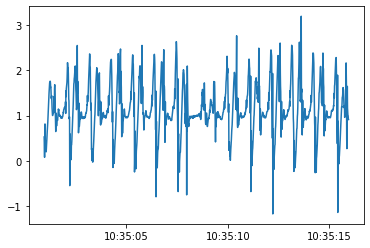

In [4]:
import matplotlib.pyplot as plt
plt.plot(data['Time'],data['gx'])
plt.plot()

[]

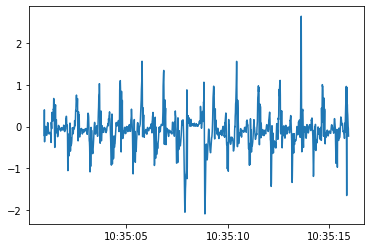

In [5]:
plt.plot(data['Time'],data['gy'])
plt.plot()

[]

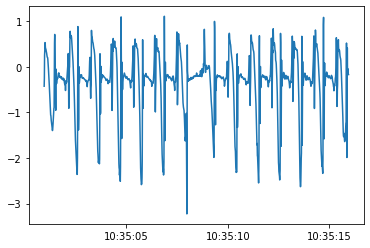

In [6]:
plt.plot(data['Time'],data['gz'])
plt.plot()

[]

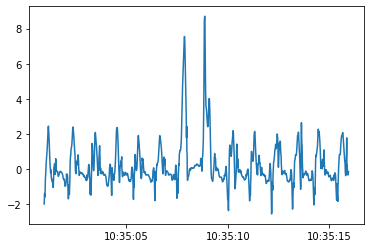

In [7]:
plt.plot(data['Time'],data['gyx'])
plt.plot()

[]

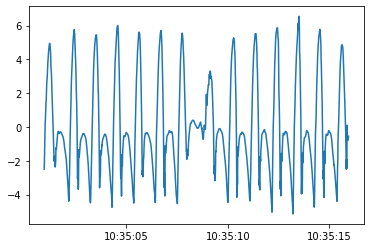

In [8]:
plt.plot(data['Time'],data['gyy'])
plt.plot()

[]

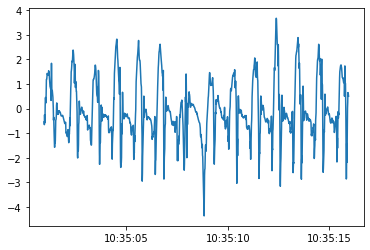

In [9]:
plt.plot(data['Time'],data['gyz'])
plt.plot()

In [10]:
import statistics
from statistics import variance
from fractions import Fraction as fr


In [11]:
m=(np.var(data['gx'])+np.var(data['gy'])+np.var(data['gz']))
print(m)
n=(np.var(data['gyx'])+np.var(data['gyy'])+np.var(data['gyz']))
print(n)

0.9429303302478391
10.376351762700295


0       0.710839
1       0.578770
2       0.451593
3       0.568955
4       0.974233
          ...   
1495    1.089926
1496    1.013819
1497    1.000559
1498    0.945320
1499    0.956375
Name: Acceleration, Length: 1500, dtype: float64


[]

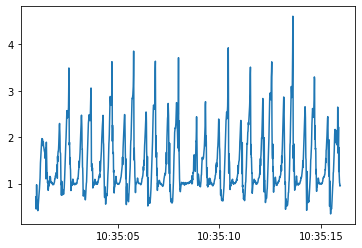

In [12]:
data['Acceleration']= pow(pow((data['gx']),2)+pow((data['gy']),2)+pow((data['gz']),2),0.5)
print(data['Acceleration'])
plt.plot(data['Time'],data['Acceleration'])
plt.plot()


0       3.237522
1       2.724295
2       2.016213
3       1.764206
4       1.550904
          ...   
1495    0.789057
1496    1.079483
1497    0.984951
1498    0.926045
1499    0.760300
Name: Gyroscope, Length: 1500, dtype: float64
3.6878264168003474


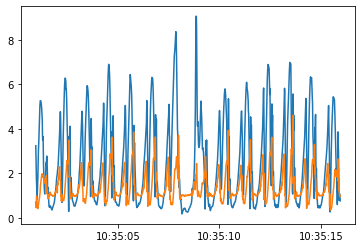

In [13]:
data['Gyroscope']= pow(pow((data['gyx']),2)+pow((data['gyy']),2)+pow((data['gyz']),2),0.5)
print(data['Gyroscope'])
plt.plot(data['Time'],data['Gyroscope'],data['Time'],data['Acceleration'])
print(np.var(data['Gyroscope']))

In [14]:
arr1= np.array([data['gyx'],data['gyy'],data['gyz']])
arr2=np.array([data['gyx']])
arr3=np.array([data['gyy']])
arr4=np.array([data['gyz']])
print(np.var(arr1))
print(arr1.shape)
print(np.cov(arr1))
mean1= np.mean(data['gyx'])
mean2= np.mean(data['gyy'])
mean3= np.mean(data['gyz'])
print(np.var(arr2))
print(np.var(arr3))
print(np.var(arr4))
covxy=(sum(np.absolute((data['gyx']-mean1)*(data['gyy']-mean2))))/300
print(covxy)
covxz=(sum((data['gyx']-mean1)*(data['gyz']-mean3)))/300
print(covxz)
covyz=(sum((data['gyy']-mean2)*(data['gyz']-mean3)))/300
print(covyz)





3.471831656045134
(3, 1500)
[[1.59805441 1.80078687 0.29380127]
 [1.80078687 7.42628557 2.60977599]
 [0.29380127 2.60977599 1.35893396]]
1.5969890371286728
7.421334716609019
1.358028008962598
11.000073539536345
1.4680269877784495
13.040180700013149


In [15]:
print(data.columns)
data.columns=['Time','gx','gy','gz','gyx','gyy','gyz','thetax','thetay','thetaz','vx','vy','vz','acc','gyro']
print(data.columns)

Index(['Time', 'gx', 'gy', 'gz', 'gyx', 'gyy', 'gyz', 'thetax', 'thetay',
       'thetaz', 'vx', 'vy', 'vz', 'Acceleration', 'Gyroscope'],
      dtype='object')
Index(['Time', 'gx', 'gy', 'gz', 'gyx', 'gyy', 'gyz', 'thetax', 'thetay',
       'thetaz', 'vx', 'vy', 'vz', 'acc', 'gyro'],
      dtype='object')


In [16]:
arr5=np.array([data['gx'],data['gy'],data['gz'],data['gyx'],data['gyy'],data['gyz'],data['thetax'],data['thetay'],data['thetaz'],data['vx'],data['vy'],data['vz']])
arr6=np.corrcoef(arr5)
arr6.shape
print(arr6)
data['Time']=pd.to_datetime(data['Time'])


[[ 1.00000000e+00  1.79063961e-01 -3.94413836e-01  4.39710373e-04
  -1.05143084e-01 -9.80329750e-02 -5.88344036e-03 -1.13690372e-01
  -1.08885751e-01  9.87045998e-01  1.69047713e-01 -3.68348402e-01]
 [ 1.79063961e-01  1.00000000e+00 -5.07255827e-01 -1.28043113e-01
   5.43419455e-03 -4.49046162e-02 -1.22438036e-01 -3.55324249e-03
  -5.96593407e-02  1.83076036e-01  9.88101934e-01 -4.95641593e-01]
 [-3.94413836e-01 -5.07255827e-01  1.00000000e+00 -1.43016904e-02
  -9.78327503e-02 -4.44574259e-02 -1.01456957e-02 -8.29763046e-02
  -2.95037906e-02 -3.70580959e-01 -5.08441081e-01  9.95946830e-01]
 [ 4.39710373e-04 -1.28043113e-01 -1.43016904e-02  1.00000000e+00
   5.22733956e-01  1.99369493e-01  9.98933835e-01  5.20738010e-01
   1.96385921e-01  5.66812550e-03 -1.16343813e-01 -3.48661987e-02]
 [-1.05143084e-01  5.43419455e-03 -9.78327503e-02  5.22733956e-01
   1.00000000e+00  8.21520172e-01  5.18976207e-01  9.99637150e-01
   8.12808016e-01 -1.01773855e-01  2.54613955e-02 -1.27094901e-01]
 [-9.

In [17]:
mean4=np.mean(data['gx'])
mean5=np.mean(data['gy'])
corrxy= sum((data['gx']-mean4)*(data['gy']-mean5))/(pow(sum(pow((data['gx']-mean4),2))*sum(pow((data['gy']-mean5),2)),0.5))
print(corrxy)
data['v']=data['vx']*data['vx']+data['vy']*data['vy']+data['vz']*data['vz']

0.1790639606532759


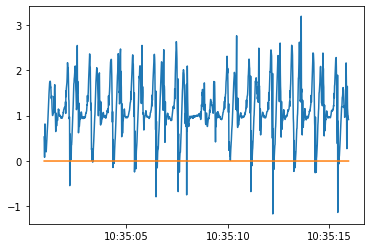

In [18]:
plt.plot(data['Time'],data['gx'],data['Time'],data['v'])

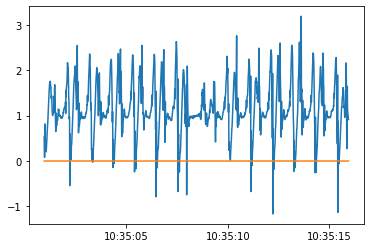

In [20]:
mean=(data['v'][0]+data['v'][1]+data['v'][2])/3
arr_vthresh= np.array(mean)
i=2;
while(i<=1498):
    mean=(data['v'][i-1]+data['v'][i]+data['v'][i+1])/3
    arr_vthresh=np.append(arr_vthresh,mean)
    i=i+1
arr_vthresh=np.append(arr_vthresh,mean)
arr_vthresh=np.append(arr_vthresh,mean)
data['vmean']=arr_vthresh
plt.plot(data['Time'], data['gx'], data['Time'],abs(data['vmean']-data['v']))

In [20]:

# #data['mark_stance']= ((data['vx'] >= 0.096) & (data['vx']<= 0.115)& (data['vz']>=-0.02) & (data['vz']<=0.02) & (data['vy']>=-0.02) & (data['vy']<=0.02) & (data['thetax']>=-0.05) & (data['thetax']<=0.05))
# plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance5'] )
# from sklearn.metrics import accuracy_score
# print(accuracy_score(data['mark_stance5'], data['mark_stance1']))
# print(accuracy_score(data['mark_stance5'], data['mark_stance2']))
# print(accuracy_score(data['mark_stance5'], data['mark_stance3']))
# print(accuracy_score(data['mark_stance5'], data['mark_stance4']))

0.004007103951880675


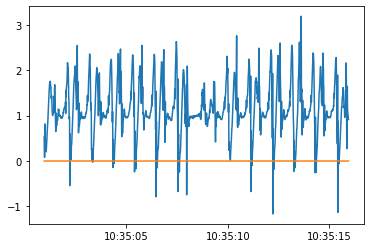

In [23]:
mean= data['vx'][0:10].sum()
mean=mean/10

mean2= data['vx'][344:354].sum()
mean2=mean2/10

mean=(mean+mean2)/2
print(mean)
i=1
arr= np.array([sum(pow((data['vx'][0:10]-mean),2))/10])
while(i<=1499):
    var1= sum(pow((data['vx'][i:(i+10)]-mean),2))/10
    i+=1
    arr=np.append(arr,var1)

np.shape(arr)
data['Var']=arr
plt.plot(data['Time'],data['gx'],data['Time'],data['Var'])
    

In [24]:
#data['acc_thresh']=((data['acc'] >= 0.97895) & (data['acc']<= 1.033))
#plt.plot(data['Time'],data['mark_stance5'],data['Time'],data['acc_thresh'])

In [25]:
from sklearn.metrics import accuracy_score
#accuracy_score(data['mark_stance'], data['acc_thresh'])

In [26]:
# arr_accthresh= np.array([data['acc'][0]])
# i=1;
# while(i<=2997):
#     mean=(data['acc'][i-1]+data['acc'][i]+data['acc'][i+1])/3
#     arr_accthresh=np.append(arr_accthresh,mean)
#     i=i+1
# arr_accthresh=np.append(arr_accthresh,data['acc'][354])
# data['accmean']=arr_accthresh
# plt.plot(data['Time'], data['accmean'], data['Time'],data['mark_stance5'])
    

In [27]:
#data['acc_thresh2']=((data['accmean'] >= 0.9876) & (data['accmean']<= 1.04))


In [28]:
#accuracy_score(data['mark_stance'], data['acc_thresh2'])

In [29]:
# plt.plot(data['Time'], data['mark_stance'], data['Time'], data['accmean'])
# plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
# # Show the minor grid as well. Style it in very light gray as a thin,
# # dotted line.
# plt.grid(which='minor', color='#CCCCCC', linestyle=':', linewidth=0.25)
# # Make the minor ticks and gridlines show.
# plt.minorticks_on()

3.054466826258739e-07


<ipython-input-40-b23334d17ef5>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance1'][k]=0
<ipython-input-40-b23334d17ef5>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance1'][k]=1


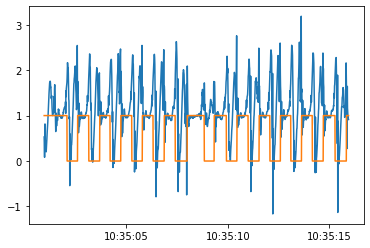

In [40]:

import math
sigma2= 3.054466826258739e-07
print(sigma2)
x=math.log10((pow(data['acc'][0]-1,2)+pow(data['acc'][1]-1,2)+pow(data['acc'][2]-1,2)+pow(data['acc'][3]-1,2)+pow(data['acc'][4]-1,2))/(5*sigma2))
arr_tm = np.array(x)
arr_tm = np.array(x)
i=2;
while(i<=1497):
    x=math.log10((pow(data['acc'][i-1]-1,2)+pow(data['acc'][i-2]-1,2)+pow(data['acc'][i+2]-1,2)+pow(data['acc'][i+1]-1,2)+pow(data['acc'][i]-1,2))/(5*sigma2))
    arr_tm=np.append(arr_tm,x)
    i+=1
arr_tm=np.append(arr_tm,x)
arr_tm=np.append(arr_tm,x)
arr_tm=np.append(arr_tm,x)
data['tm1']=arr_tm

data['mark_stance1']=(data['tm1']<6.5)
l=0
i=0
j=0
while(i<=1499):
    k=j
    l=0
    while(j<=1499):
        if data['mark_stance1'][j]==1 :
            l+=1
            j+=1
        else :
            if(l<40):
                while(k<=j):
                    data['mark_stance1'][k]=0
                    k+=1
            j+=1
            k=j
            l=0
    i=j      
l=0
i=0
j=0
while(i<=1499):
    k=j
    l=0
    while(j<=1499):
        if data['mark_stance1'][j]==0 :
            l+=1
            j+=1
        else :
            if(l<40):
                while(k<=j):
                    data['mark_stance1'][k]=1
                    k+=1
            j+=1
            k=j
            l=0
    i=j 
plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance1'])

    
    

<ipython-input-45-d4b0e7a76203>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance2'][k]=0
<ipython-input-45-d4b0e7a76203>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance2'][k]=1


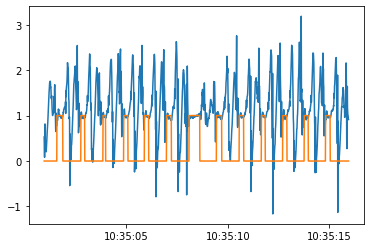

In [45]:

x=(pow(data['gyro'][0],2)+pow(data['gyro'][1],2)+pow(data['gyro'][2],2)+pow(data['gyro'][3],2)+pow(data['gyro'][4],2))/(5)
arr_tm2 = np.array(x)
arr_tm2 = np.array(x)
i=2;
while(i<=1497):
    x=(pow(data['gyro'][i-2],2)+pow(data['gyro'][i-1],2)+pow(data['gyro'][i],2)+pow(data['gyro'][i+1],2)+pow(data['gyro'][i+2],2))/(5)
    arr_tm2=np.append(arr_tm2,x)
    i+=1
arr_tm2=np.append(arr_tm2,x)
arr_tm2=np.append(arr_tm2,x)
arr_tm2=np.append(arr_tm2,x)
data['tm2']=arr_tm2

data['mark_stance2']=(data['tm2']<0.6)
l=0
i=0
j=0
while(i<=1499):
    k=j
    l=0
    while(j<=1499):
        if data['mark_stance2'][j]==1 :
            l+=1
            j+=1
        else :
            if(l<10):
                while(k<=j):
                    data['mark_stance2'][k]=0
                    k+=1
            j+=1
            k=j
            l=0
    i=j      
l=0
i=0
j=0
while(i<=1499):
    k=j
    l=0
    while(j<=1499):
        if data['mark_stance2'][j]==0 :
            l+=1
            j+=1
        else :
            if(l<10):
                while(k<=j):
                    data['mark_stance2'][k]=1
                    k+=1
            j+=1
            k=j
            l=0
    i=j 
plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance2'])


<ipython-input-47-8ce5fa8725f3>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance3'][k]=0
<ipython-input-47-8ce5fa8725f3>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance3'][k]=1


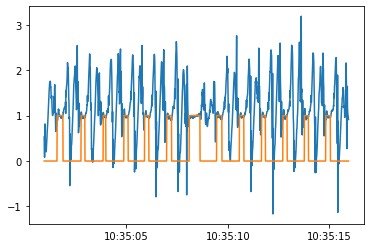

In [47]:

meax2= np.mean(data['gx'][0:4])
meay2= np.mean(data['gy'][0:4])
meaz2= np.mean(data['gz'][0:4])
x=(pow(pow(data['gx'][0]-meax2,2)+pow(data['gy'][0]-meay2,2)+pow(data['gz'][0]-meaz2,2),0.5)+pow(pow(data['gx'][1]-meax2,2)+pow(data['gy'][1]-meay2,2)+pow(data['gz'][1]-meaz2,2),0.5)+pow(pow(data['gx'][2]-meax2,2)+pow(data['gy'][2]-meay2,2)+pow(data['gz'][2]-meaz2,2),0.5)+pow(pow(data['gx'][3]-meax2,2)+pow(data['gy'][3]-meay2,2)+pow(data['gz'][3]-meaz2,2),0.5)+pow(pow(data['gx'][4]-meax2,2)+pow(data['gy'][4]-meay2,2)+pow(data['gz'][4]-meaz2,2),0.5))/(5)
arr_tm3 = np.array(x)
arr_tm3=np.append(arr_tm3,x)
i=2;
while(i<=1497):
    meax2= np.mean(data['gx'][i:i+4])
    meay2= np.mean(data['gy'][i:i+4])
    meaz2= np.mean(data['gz'][i:i+4])
    x=(pow(data['gyro'][i-2],2)+pow(data['gyro'][i-1],2)+pow(data['gyro'][i],2)+pow(data['gyro'][i+1],2)+pow(data['gyro'][i+2],2))/(5)
    arr_tm3=np.append(arr_tm3,x)
    i+=1
arr_tm3=np.append(arr_tm3,x)
arr_tm3=np.append(arr_tm3,x)

data['tm3']=arr_tm3
data['mark_stance3']=(data['tm3']<0.6)
l=0
i=0
j=0
while(i<=1499):
    k=j
    l=0
    while(j<=1499):
        if data['mark_stance3'][j]==1 :
            l+=1
            j+=1
        else :
            if(l<10):
                while(k<=j):
                    data['mark_stance3'][k]=0
                    k+=1
            j+=1
            k=j
            l=0
    i=j      
l=0
i=0
j=0
while(i<=1499):
    k=j
    l=0
    while(j<=1499):
        if data['mark_stance3'][j]==0 :
            l+=1
            j+=1
        else :
            if(l<10):
                while(k<=j):
                    data['mark_stance3'][k]=1
                    k+=1
            j+=1
            k=j
            l=0
    i=j 
plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance3'])

<ipython-input-49-0aaed19e2746>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance4'][k]=0
<ipython-input-49-0aaed19e2746>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance4'][k]=1


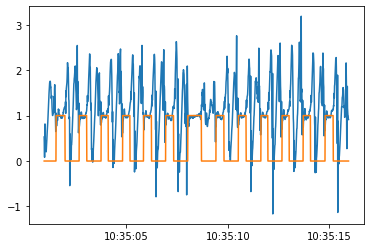

In [49]:
sigmaa=3.054466826258739e-07
sigmaw=4.374101426993713e-05
meax2= np.mean(data['gx'][0:4])
meay2= np.mean(data['gy'][0:4])
meaz2= np.mean(data['gz'][0:4])
mea2= pow((meax2*meax2)+(meay2*meay2)+(meaz2*meaz2),0.5)
x=(pow(pow(data['gx'][0]-(meax2/mea2),2)+pow(data['gy'][0]-(meay2/mea2),2)+pow(data['gz'][0]-(meaz2/mea2),2),0.5)+pow(pow(data['gx'][1]-(meax2/mea2),2)+pow(data['gy'][1]-(meay2/mea2),2)+pow(data['gz'][1]-(meaz2/mea2),2),0.5)+pow(pow(data['gx'][2]-(meax2/mea2),2)+pow(data['gy'][2]-(meay2/mea2),2)+pow(data['gz'][2]-(meaz2/mea2),2),0.5)+pow(pow(data['gx'][3]-(meax2/mea2),2)+pow(data['gy'][3]-(meay2/mea2),2)+pow(data['gz'][3]-(meaz2/mea2),2),0.5)+pow(pow(data['gx'][4]-(meax2/mea2),2)+pow(data['gy'][4]-(meay2/mea2),2)+pow(data['gz'][4]-(meaz2/mea2),2),0.5)+pow(pow(data['gx'][5]-(meax2/mea2),2)+pow(data['gy'][5]-(meay2/mea2),2)+pow(data['gz'][5]-(meaz2/mea2),2),0.5)+pow(pow(data['gx'][6]-(meax2/mea2),2)+pow(data['gz'][6]-(meaz2/mea2),2)+pow(data['gy'][6]-(meay2/mea2),2),0.5))/(7*sigmaa)
y=(pow(data['gyro'][0],2)+pow(data['gyro'][1],2)+pow(data['gyro'][2],2)+pow(data['gyro'][3],2)+pow(data['gyro'][4],2)+pow(data['gyro'][5],2)++pow(data['gyro'][6],2))/(7*sigmaw)
z=math.log10(x+y)
arr_tm4 = np.array(z)
arr_tm4=np.append(arr_tm4,z)
arr_tm4=np.append(arr_tm4,z)
i=4;
while(i<=1496):
    meax2= np.mean(data['gx'][i:i+6])
    meay2= np.mean(data['gy'][i:i+6])
    meaz2= np.mean(data['gz'][i:i+6])
    mea2= pow((meax2*meax2)+(meay2*meay2)+(meaz2*meaz2),0.5)
    x=(pow(pow(data['gx'][i-3]-meax2/mea2,2)+pow(data['gy'][i-3]-meay2/mea2,2)+pow(data['gz'][i-3]-meaz2/mea2,2),0.5)+pow(pow(data['gx'][i-2]-meax2/mea2,2)+pow(data['gy'][i-2]-meay2/mea2,2)+pow(data['gz'][i-2]-meaz2/mea2,2),0.5)+pow(pow(data['gx'][i-1]-meax2/mea2,2)+pow(data['gy'][i-1]-meay2/mea2,2)+pow(data['gz'][i-1]-meaz2/mea2,2),0.5)+pow(pow(data['gx'][i]-meax2/mea2,2)+pow(data['gy'][i]-meay2/mea2,2)+pow(data['gz'][i]-meaz2/mea2,2),0.5)+pow(pow(data['gx'][i+1]-meax2/mea2,2)+pow(data['gy'][i+1]-meay2/mea2,2)+pow(data['gz'][i+1]-meaz2/mea2,2),0.5)+pow(pow(data['gx'][i+2]-meax2/mea2,2)+pow(data['gy'][i+2]-meay2/mea2,2)+pow(data['gz'][i+2]-meaz2/mea2,2),0.5)+pow(pow(data['gx'][i+3]-meax2/mea2,2)+pow(data['gy'][i+3]-meay2/mea2,2)+pow(data['gz'][i+3]-meaz2/mea2,2),0.5))/(7*sigmaa)
    y=(pow(data['gyro'][i-2],2)+pow(data['gyro'][i-1],2)+pow(data['gyro'][i],2)+pow(data['gyro'][i+1],2)+pow(data['gyro'][i+2],2))/(7*sigmaw)
    z=math.log10(x+y)
    arr_tm4=np.append(arr_tm4,z)
    i+=1
arr_tm4=np.append(arr_tm4,z)
arr_tm4=np.append(arr_tm4,z)
arr_tm4=np.append(arr_tm4,z)
arr_tm4=np.append(arr_tm4,z)
data['tm4']=arr_tm4

data['mark_stance4']=(data['tm4']<6)
l=0
i=0
j=0
while(i<=1499):
    k=j
    l=0
    while(j<=1499):
        if data['mark_stance4'][j]==1 :
            l+=1
            j+=1
        else :
            if(l<10):
                while(k<=j):
                    data['mark_stance4'][k]=0
                    k+=1
            j+=1
            k=j
            l=0
    i=j      
l=0
i=0
j=0
while(i<=1499):
    k=j
    l=0
    while(j<=1499):
        if data['mark_stance4'][j]==0 :
            l+=1
            j+=1
        else :
            if(l<10):
                while(k<=j):
                    data['mark_stance4'][k]=1
                    k+=1
            j+=1
            k=j
            l=0
    i=j 
plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance4'])

<ipython-input-32-240e715d81d7>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance5'][k]=0
<ipython-input-32-240e715d81d7>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance5'][k]=1


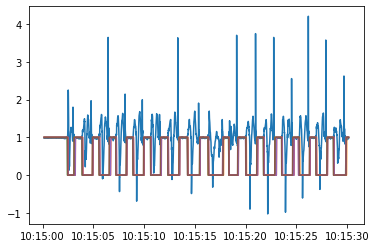

In [32]:
# %matplotlib notebook
z= np.var(data['acc'][0:5])
arr_slipvar=np.array([0,0,0,0,0,z])
i=6
while(i<=1499):
    z=np.var(data['acc'][i-5:i])
    arr_slipvar=np.append(arr_slipvar,z)
    i+=1
data['slipvar']=arr_slipvar
from scipy.signal import find_peaks
x = data['slipvar']
peaks, _ = find_peaks(x, height=0,distance=40)
# plt.plot(x)
# plt.plot(peaks, x[peaks], "x")
# plt.plot(np.zeros_like(x), "--", color="gray")
# plt.show()
#print(x[peaks])
i=2206
var1=arr_slipvar[i]
while(i<=2262):
    var1=min(arr_slipvar[i],var1)
    i+=1
i=2027
var2=arr_slipvar[i]
while(i<=2083):
    var2=min(arr_slipvar[i],var2)
    i+=1
i=1836
var3=arr_slipvar[i]
while(i<=1897):
    var3=min(arr_slipvar[i],var3)
    i+=1
i=1627
var4=arr_slipvar[i]
while(i<=1667):
    var4=min(arr_slipvar[i],var4)
    i+=1
i=1260
var5=arr_slipvar[i]
while(i<=1317):
    var5=min(arr_slipvar[i],var5)
    i+=1
i=1079
var6=arr_slipvar[i]
while(i<=1137):
    var6=min(arr_slipvar[i],var6)
    i+=1
var7=arr_slipvar[i]
acc_thresh= max(var1,var2,var3,var4,var5,var6)
data['mark_stance5']=(data['slipvar']<=(0.0005))
l=0
i=0
j=0
while(i<=2998):
    k=j
    l=0
    while(j<=2998):
        if data['mark_stance5'][j]==1 :
            l+=1
            j+=1
        else :
            if(l<20):
                while(k<=j):
                    data['mark_stance5'][k]=0
                    k+=1
            j+=1
            k=j
            l=0
    i=j      
l=0
i=0
j=0
while(i<=2998):
    k=j
    l=0
    while(j<=2998):
        if data['mark_stance5'][j]==0 :
            l+=1
            j+=1
        else :
            if(l<10):
                while(k<=j):
                    data['mark_stance5'][k]=1
                    k+=1
            j+=1
            k=j
            l=0
    i=j 
plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance5'], data['Time'],data['mark_stance4'], data['Time'],data['mark_stance3'],data['Time'],data['mark_stance2'], data['Time'],data['mark_stance1'])





In [33]:
#data['mark_stance']= ((data['vx'] >= 0.096) & (data['vx']<= 0.115)& (data['vz']>=-0.02) & (data['vz']<=0.02) & (data['vy']>=-0.02) & (data['vy']<=0.02) & (data['thetax']>=-0.05) & (data['thetax']<=0.05))
#plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance5'] )
from sklearn.metrics import accuracy_score
print(accuracy_score(data['mark_stance5'], data['mark_stance1']))
print(accuracy_score(data['mark_stance5'], data['mark_stance2']))
print(accuracy_score(data['mark_stance5'], data['mark_stance3']))
print(accuracy_score(data['mark_stance5'], data['mark_stance4']))

0.9563187729243081
0.9633211070356785
0.9579859953317773
0.9679893297765922


In [50]:
arr_mean= np.array([data['acc'][0:1]])
i=2
while(i<=1498):
    x= np.mean(data['acc'][i-2:i+2])
    arr_mean=np.append(arr_mean,x)
    i+=1
arr_mean=np.append(arr_mean,x)
arr_mean=np.append(arr_mean,x)
data['mean_acc']=arr_mean
print(data['mean_acc'])

0       0.710839
1       0.577539
2       0.643388
3       0.666938
4       0.714081
          ...   
1495    1.082573
1496    1.012406
1497    0.979018
1498    0.979018
1499    0.979018
Name: mean_acc, Length: 1500, dtype: float64


In [51]:
arr_var= np.array(np.var([data['acc'][0:4]]))
j=2
while(j<=1498):
    x= np.var(data['acc'][j-2:j+2])
    arr_var=np.append(arr_var,x)
    j+=1
arr_var=np.append(arr_var,x)
arr_var=np.append(arr_var,x)
data['var_acc']=arr_var
print(data['var_acc'])

0       0.008427
1       0.008427
2       0.038990
3       0.037610
4       0.023973
          ...   
1495    0.008019
1496    0.002663
1497    0.000831
1498    0.000831
1499    0.000831
Name: var_acc, Length: 1500, dtype: float64


In [52]:
x=np.mean(data['acc'][0:4])
y= ((sum((data['acc'][0:4]-x)**2))/4)**0.5
arr_rmse = np.array(y);
j=2
while(j<=1498):
    x=np.mean(data['acc'][j-2:j+2])
    y= ((sum((data['acc'][j-2:j+2]-x)**2))/4)**0.5
    arr_rmse=np.append(arr_rmse,y)
    j+=1
arr_rmse=np.append(arr_rmse,y)
arr_rmse=np.append(arr_rmse,y)
data['rmse_acc']=arr_rmse
print(data['rmse_acc'])


0       0.091797
1       0.091797
2       0.197458
3       0.193933
4       0.154834
          ...   
1495    0.089548
1496    0.051605
1497    0.028824
1498    0.028824
1499    0.028824
Name: rmse_acc, Length: 1500, dtype: float64


In [53]:
x= np.mean(data['acc'][0:4])
y= ((sum(abs(data['acc'][0:4]-x)))/4)
arr_mae = np.array(y);
j=2
while(j<=1498):
    x=np.mean(data['acc'][j-2:j+2])
    y= ((sum(abs(data['acc'][j-2:j+2]-x)))/4)
    arr_mae=np.append(arr_mae,y)
    j+=1
arr_mae=np.append(arr_mae,y)
arr_mae=np.append(arr_mae,y)
data['mae_acc']=arr_mae
print(data['mae_acc'])


0       0.067265
1       0.067265
2       0.165422
3       0.156664
4       0.130076
          ...   
1495    0.075384
1496    0.039466
1497    0.028171
1498    0.028171
1499    0.028171
Name: mae_acc, Length: 1500, dtype: float64


In [54]:
x= np.mean(data['gyro'][0:4])
y= ((sum(abs(data['gyro'][0:4]-x)))/4)
arr_mae = np.array(y);
j=2
while(j<=1498):
    x=np.mean(data['gyro'][j-2:j+2])
    y= ((sum(abs(data['gyro'][j-2:j+2]-x)))/4)
    arr_mae=np.append(arr_mae,y)
    j+=1
arr_mae=np.append(arr_mae,y)
arr_mae=np.append(arr_mae,y)
data['mae_gyro']=arr_mae
print(data['mae_gyro'])

0       0.545350
1       0.545350
2       0.356349
3       0.267045
4       0.331215
          ...   
1495    0.119742
1496    0.087333
1497    0.094522
1498    0.094522
1499    0.094522
Name: mae_gyro, Length: 1500, dtype: float64


In [56]:
arr_q= np.array(data['acc'])
arr_q=sorted(arr_q)
Q3_acc = np.median(arr_q[749:])
print(Q3_acc)

1.7715031062418365


In [55]:
arr_q= np.array(data['gyro'])
arr_q=sorted(arr_q)
Q3_gyro = np.median(arr_q[749:])
print(Q3_gyro)

3.9843316041229677


In [57]:
arr5=np.array([data['gx'],data['gy'],data['gz'],data['gyx'],data['gyy'],data['gyz']])
arr6=np.corrcoef(arr5)
arr6.shape
print(arr6)

[[ 1.00000000e+00  1.79063961e-01 -3.94413836e-01  4.39710373e-04
  -1.05143084e-01 -9.80329750e-02]
 [ 1.79063961e-01  1.00000000e+00 -5.07255827e-01 -1.28043113e-01
   5.43419455e-03 -4.49046162e-02]
 [-3.94413836e-01 -5.07255827e-01  1.00000000e+00 -1.43016904e-02
  -9.78327503e-02 -4.44574259e-02]
 [ 4.39710373e-04 -1.28043113e-01 -1.43016904e-02  1.00000000e+00
   5.22733956e-01  1.99369493e-01]
 [-1.05143084e-01  5.43419455e-03 -9.78327503e-02  5.22733956e-01
   1.00000000e+00  8.21520172e-01]
 [-9.80329750e-02 -4.49046162e-02 -4.44574259e-02  1.99369493e-01
   8.21520172e-01  1.00000000e+00]]


In [58]:
import seaborn as sns
arr5=np.array([data['gx'],data['gy'],data['gz'],data['gyx'],data['gyy'],data['gyz'], data['acc'], data['gyro'], data['mean_acc'], data['var_acc'], data['rmse_acc'],data['mae_acc'], data['mae_gyro']])
arr6=np.corrcoef(arr5)
print(arr6)

[[ 1.00000000e+00  1.79063961e-01 -3.94413836e-01  4.39710373e-04
  -1.05143084e-01 -9.80329750e-02  7.99321215e-01  3.82294158e-01
   7.84501172e-01  2.36285049e-01  3.31531695e-01  3.39061084e-01
   1.32215999e-02]
 [ 1.79063961e-01  1.00000000e+00 -5.07255827e-01 -1.28043113e-01
   5.43419455e-03 -4.49046162e-02  2.49982214e-01 -1.80353234e-01
   2.40605253e-01  3.20184966e-01  2.44668819e-01  2.48476226e-01
   1.99339123e-01]
 [-3.94413836e-01 -5.07255827e-01  1.00000000e+00 -1.43016904e-02
  -9.78327503e-02 -4.44574259e-02 -6.96555897e-01 -6.98092523e-02
  -7.04094206e-01 -3.13761792e-01 -2.97933390e-01 -2.99089974e-01
  -3.85343085e-01]
 [ 4.39710373e-04 -1.28043113e-01 -1.43016904e-02  1.00000000e+00
   5.22733956e-01  1.99369493e-01  9.56266694e-02  5.64397697e-01
   1.16983921e-01  6.58159784e-02  9.89909917e-02  1.04149661e-01
   1.47277499e-01]
 [-1.05143084e-01  5.43419455e-03 -9.78327503e-02  5.22733956e-01
   1.00000000e+00  8.21520172e-01 -4.56807554e-02  4.20231772e-01


In [59]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)
data.dropna(how='all', axis=1, inplace=True)
data = data.iloc[:,1:-1]
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')
data.head()

,gx,gy,gz,gyx,gyy,gyz,thetax,thetay,thetaz,vx,...,tm2,mark_stance2,tm3,mark_stance3,tm4,mark_stance4,mean_acc,var_acc,rmse_acc,mae_acc
0,164.0,-0.211166,-0.424660,-1.983914,-2.500686,-0.540558,-0.021401,-0.024585,-0.005387,0.004828,...,5.497234,False,0.521066,False,6.413017,False,0.710839,0.008427,0.091797,0.067265
1,119.0,0.402018,-0.250546,-1.581383,-2.119468,-0.654877,-0.016216,-0.020792,-0.006773,0.002884,...,5.497234,False,0.521066,False,6.413017,False,0.577539,0.008427,0.091797,0.067265
2,54.0,-0.362669,0.256205,-1.388376,-1.440003,-0.252819,-0.011572,-0.014229,-0.003384,0.002360,...,3.670664,False,5.497234,False,6.413017,False,0.643388,0.038990,0.197458,0.165422
3,137.0,-0.211422,0.354913,-1.601511,-0.507467,-0.538574,-0.017536,-0.003610,-0.003616,0.001629,...,2.323727,False,3.670664,False,6.261436,False,0.666938,0.037610,0.193933,0.156664
4,253.0,0.011121,0.532825,-1.435329,0.100652,-0.578795,-0.014019,0.002428,-0.007657,0.010573,...,1.695749,False,2.323727,False,6.186131,False,0.714081,0.023973,0.154834,0.130076


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# X=data.drop({'mark_stance5','Time','vx','vy','vz','thetax','thetay','thetaz'},axis='columns')
# y=data['mark_stance5']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)
# print("X_train:", X_train.shape) # X_train
# print("X_test:",X_test.shape) # X_test
# print("y_train:",y_train.shape) # y_train
# print("y_test:",y_test.shape) # y_test
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# X_train_scaled=scaler.fit_transform(X_train)
# X_test_scaled=scaler.transform(X_test)
# classification=LogisticRegression(random_state=2021)
# classification.fit(X_train_scaled,y_train)
# y_predict=classification.predict(X_test_scaled)
# y_predict



<AxesSubplot:>

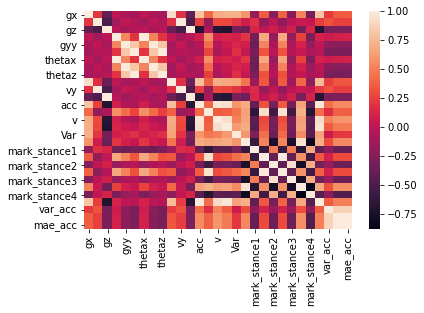

In [61]:

import seaborn as sns
corr = data.corr()
sns.heatmap(corr)

In [62]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [63]:
selected_columns = data.columns[columns]
data = data[selected_columns]
selected_columns = selected_columns[1:].values
print(selected_columns)

['gy' 'gz' 'gyx' 'gyy' 'gyz' 'acc' 'gyro' 'Var' 'tm1' 'mark_stance1'
 'mark_stance2' 'mark_stance4' 'var_acc' 'rmse_acc']


In [64]:
import statsmodels.formula.api as sm
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)                    
    regressor_OLS.summary()
    return x, columns

In [65]:
SL = 0.01
Y=data.iloc[:,1:].values
Y=np.array(Y, dtype=float)
X_opt=data.iloc[:,0].values
X_opt = np.array(X_opt, dtype=float)
data_modeled, selected_columns = backwardElimination(Y,X_opt, SL, selected_columns)
print(selected_columns)

['gy' 'gz' 'gyx' 'gyy' 'gyz' 'acc' 'gyro' 'Var' 'tm1' 'mark_stance1'
 'var_acc']


In [66]:

data.describe()

,gx,gy,gz,gyx,gyy,gyz,acc,gyro,Var,tm1,var_acc,rmse_acc
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,749.500000,-0.083458,-0.346573,0.221323,0.093580,-0.058132,1.410415,2.598008,0.000089,5.233889,0.031524,0.112606
std,433.157015,0.396602,0.692114,1.264142,2.725121,1.165733,0.644382,1.921012,0.000077,1.342426,0.099860,0.137319
min,0.000000,-2.091078,-3.226817,-2.551418,-5.148460,-4.371478,0.346929,0.175368,0.000001,1.438427,0.000002,0.001499
25%,374.750000,-0.226802,-0.382012,-0.442546,-1.669810,-0.687338,0.993119,0.854366,0.000033,4.279235,0.000596,0.024404
50%,749.500000,-0.084945,-0.236123,-0.140850,-0.435212,-0.264542,1.130978,2.115228,0.000052,5.527342,0.004911,0.070076
75%,1124.250000,0.047930,-0.038034,0.600527,1.848158,0.578454,1.771695,3.985273,0.000138,6.353629,0.022805,0.151013
max,1499.000000,2.645212,1.111056,8.703506,6.547801,3.679778,4.602194,9.053959,0.000362,7.350495,1.429529,1.195629


In [67]:
data.isna().sum()

gx              0
gy              0
gz              0
gyx             0
gyy             0
gyz             0
acc             0
gyro            0
Var             0
tm1             0
mark_stance1    0
mark_stance2    0
mark_stance4    0
var_acc         0
rmse_acc        0
dtype: int64

In [69]:
X=data.drop(['mark_stance1','mark_stance2','mark_stance4','tm1'],axis='columns')
y=data['mark_stance4']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)


In [70]:
print("X_train:", X_train.shape) # X_train
print("X_test:",X_test.shape) # X_test
print("y_train:",y_train.shape) # y_train
print("y_test:",y_test.shape) # y_test


X_train: (1125, 11)
X_test: (375, 11)
y_train: (1125,)
y_test: (375,)


In [71]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [72]:
classification=LogisticRegression(random_state=2021)
classification.fit(X_train_scaled,y_train)
y_predict=classification.predict(X_test_scaled)
y_predict

array([False, False, False, False,  True, False,  True,  True,  True,
       False, False,  True, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False,  True,  True, False, False,  True, False,  True,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False, False, False,  True,  True,  True,  True,
       False,  True, False, False,  True,  True, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True, False,  True, False,
        True, False, False, False,  True,  True, False,  True, False,
       False, False,

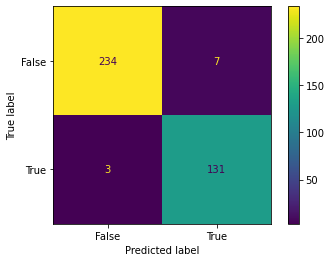

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
plot_confusion_matrix(classification, X_test_scaled, y_test)

In [74]:
accuracy_score(y_test,y_predict)

0.9733333333333334

In [78]:
from sklearn import svm
clf=svm.SVC(C=50,gamma='scale')
clf.fit(X_train_scaled,y_train)
y_predict=clf.predict(X_test_scaled)
y_predict

array([False, False,  True, False,  True, False,  True, False,  True,
       False, False, False,  True,  True, False,  True,  True, False,
        True, False,  True,  True, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False,  True, False, False,  True,  True, False,  True,  True,
        True, False, False, False, False,  True,  True, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True,  True,  True,
        True, False, False, False, False, False,  True, False,  True,
        True, False, False, False, False, False,  True, False, False,
        True, False,  True,  True, False,  True, False,  True, False,
       False, False,

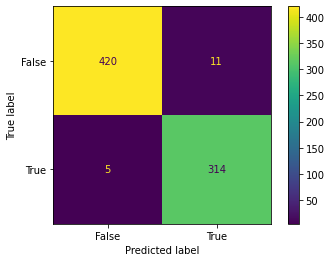

In [79]:
plot_confusion_matrix(clf, X_test_scaled, y_test)

In [80]:
accuracy_score(y_test,y_predict)

0.9786666666666667